# Examine $M_*$ versus $z$ relation

In [1]:
import os
import h5py 
import fitsio
import numpy as np

In [2]:
from astropy import table as aTable

In [3]:
from desitarget.sv3.sv3_targetmask import bgs_mask as sv3_bgs_mask

In [5]:
# -- plotting -- 
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False

In [6]:
fvagc = '/global/cfs/cdirs/desi/users/chahah/provabgs/svda/BGS_ANY_full.provabgs.hdf5'
vagc = aTable.Table.read(fvagc)
has_va = (vagc['provabgs_z_max'] != -999.)

In [7]:
bgs_bright = vagc[vagc['is_bgs_bright'] & has_va]

In [8]:
bgs_bright[:5]

TARGETID,RA,DEC,Z_HP,ZERR,TSNR2_BGS,MAG_G,MAG_R,MAG_Z,MAG_W1,FIBMAG_R,HPIX_64,"provabgs_mcmc [100,13]",provabgs_theta_bf [13],provabgs_z_max,provabgs_logMstar_bf,provabgs_logMstar [100],SCHLEGEL_COLOR,provabgs_w_zfail,provabgs_w_fibassign,is_bgs_bright,is_bgs_faint
int64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool
39633390185480938,191.14757099005186,60.345815959235,0.2819459922463374,2.191690764397e-05,1361.7778,20.420939956138607,19.440977833152942,18.807486906915823,18.725561063547207,21.083244145949642,11226,11.091623656909688 .. 0.3684622521221414,11.14249424405227 .. 0.3651476796540595,0.2891440449335749,10.894820213317871,10.848259925842285 .. 10.952618598937988,0.1059712957858181,1.0369954283580962,3.0714285714285716,True,False
39633416324383107,187.05117249536465,62.614542270156655,0.2703579310142208,0.00018002802349298926,1218.0295,20.876585604498494,19.373871860075226,18.567397256862876,18.32574859422363,20.212708263179056,11251,11.127879812361321 .. 0.6691898790548064,11.16028636319183 .. 0.6710591095679554,0.2822033708476234,10.909546852111816,10.877055168151855 .. 10.874772071838379,-0.3616078306686752,1.0018031916676053,1.0,True,False
39633393155049303,187.83760708675698,60.38987543677365,0.1731108191825362,2.1990725452772437e-05,1234.5317,19.69273753706838,18.892550253715136,18.34277957526595,18.565848448993197,21.00700131929247,11237,10.462320138967206 .. 0.2729800106294297,10.502975152735333 .. 0.2744993206027024,0.21924790414805623,10.27071762084961,10.239782333374023 .. 10.281316757202148,0.01670638624886256,1.029546314947554,1.8169014084507042,True,False
39633390164510257,188.7298325265811,60.181046704454054,0.2854181586411897,8.005616412868143e-06,1080.5574,20.021376563811977,19.091834839420468,18.488285412624066,18.38746082854565,20.641812033703985,11237,11.113035968148562 .. 0.3947223033620342,11.257075728183183 .. 0.3983021711356034,0.32988420863892076,11.017786979675293,10.893733024597168 .. 11.032293319702148,0.18537451480860634,1.0090948854283563,3.6857142857142855,True,False
39633396124617897,187.04622815471808,60.82670180284912,0.37400455377945924,7.204306804440984e-05,1230.1184,20.981597394532177,19.43493695012083,18.528152481985934,17.661754869208693,20.920672799869905,11237,11.576280755647756 .. 0.3713771184202182,11.529095176742617 .. 0.3710937098062413,0.38290726050663504,11.287631034851074,11.330133438110352 .. 11.413797378540039,0.21040507948362408,1.0227117428257106,1.0,True,False


In [13]:
bgs_faint = vagc[vagc['is_bgs_faint'] & has_va]

(6.0, 13.0)

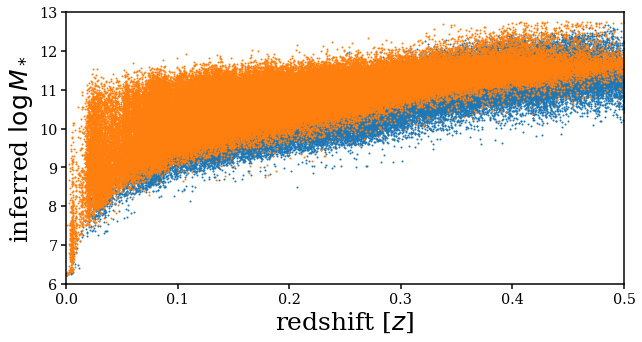

In [15]:
fig = plt.figure(figsize=(10,5))
sub = fig.add_subplot(111)
sub.scatter(bgs_faint['Z_HP'].data, bgs_faint['provabgs_logMstar_bf'].data, c='C0', s=1, rasterized=True)
sub.scatter(bgs_bright['Z_HP'].data, bgs_bright['provabgs_logMstar_bf'].data, c='C1', s=1, rasterized=True)
sub.set_xlabel(r'redshift [$z$]', fontsize=25)
sub.set_xlim(0, 0.5)
sub.set_ylabel(r'inferred $\log M_*$', fontsize=25)
sub.set_ylim(6., 13.)